In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
import math

In [3]:
data=input_data.read_data_sets("data/MNIST/",one_hot=True) 
data.test.cls = tf.argmax(data.test.labels, axis=1)
#one_hot= Whether to make the labels into a binary array
print("Size of:")
print("Training set \t\t{}".format(len(data.train.labels)))
print("Test set\t\t{}".format(len(data.test.labels)))
print("Validation set\t\t{}".format(len(data.validation.labels)))

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Size of:
Training set 		55000
Test set		10000
Validation set		5000


In [4]:
imgSize=28
imgSizeFlat=imgSize*imgSize
imgShape=(imgSize,imgSize)
noClasses=10
noColorChannels=1
batchSize=100

In [5]:
xFlat=tf.placeholder(tf.float32,shape=[None,imgSizeFlat],name='xFlat')
x2D=tf.reshape(xFlat,[-1,imgSize,imgSize,noColorChannels])
yTrue=tf.placeholder(tf.float32,shape=[None,noClasses],name='yTrue')
yTrueClass=tf.argmax(yTrue,axis=1)

In [6]:
'''layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)'''

layer1_filterLength=5
layer1_filterHeight=5
layer1_noFilters=10

layer1_shape=[layer1_filterLength,layer1_filterHeight,noColorChannels,layer1_noFilters]
layer1_weights=tf.Variable(tf.truncated_normal(layer1_shape,stddev=0.5))
layer1_biases=tf.Variable(tf.constant(0.05,shape=[layer1_noFilters]))
layer1_out=tf.nn.conv2d(input=x2D,filter=layer1_weights,strides=[1,1,1,1],padding='SAME')
#strides=[img,x,y,colourChannel]
layer1_out=layer1_out+layer1_biases
layer1_out=tf.nn.max_pool(value=layer1_out,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
layer1_out=tf.nn.relu(layer1_out)

In [7]:
'''layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)'''


layer2_filterLength=2
layer2_filterHeight=2
layer2_noFilters=5

layer2_shape=[layer2_filterLength,layer2_filterHeight,layer1_noFilters,layer2_noFilters]
layer2_weights=tf.Variable(tf.truncated_normal(layer2_shape,stddev=0.5))
layer2_biases=tf.Variable(tf.constant(0.05,shape=[layer2_noFilters]))
layer2_out=tf.nn.conv2d(input=layer1_out,filter=layer2_weights,strides=[1,2,2,1],padding='SAME')
#strides=[img,x,y,colourChannel]
layer2_out=layer2_out+layer2_biases
#layer2_out=tf.nn.max_pool(value=layer1_out,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
layer2_out=tf.nn.relu(layer2_out)

In [8]:
'''layer_flat, num_features = flatten_layer(layer_conv2)'''
layer3_shape=layer2_out.get_shape()  # layer_shape == [num_images, img_height, img_width, num_channels]
layer3_noFeatures=int(layer3_shape[1]*layer3_shape[2]*layer3_shape[3])
layer3_out=tf.reshape(layer2_out,[-1,layer3_noFeatures])
# The shape of the flattened layer is now:
# [num_images, img_height * img_width * num_channels] -1 means "caclculate this axis size"






In [9]:
'''layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)'''
layer4_outSize=100
layer4_shape=[layer3_noFeatures,layer4_outSize]
print(layer4_shape)
layer4_weights=tf.Variable(tf.truncated_normal(layer4_shape,stddev=0.5))
layer4_biases=tf.Variable(tf.constant(0.05,shape=[layer4_outSize]))
layer4_out=tf.matmul(layer3_out,layer4_weights)+layer4_biases
layer4_out=tf.nn.relu(layer4_out)

[245, 100]


In [22]:
'''
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)'''

layer5_outSize=10
layer5_shape=[layer4_outSize,layer5_outSize]
print(layer5_shape)
layer5_weights=tf.Variable(tf.truncated_normal(layer5_shape,stddev=0.5))
layer5_biases=tf.Variable(tf.constant(0.05,shape=[layer5_outSize]))
layer5_out=tf.matmul(layer4_out,layer5_weights)+layer5_biases
layer5_out=tf.nn.relu(layer5_out)

[100, 10]


In [11]:
yPred=tf.nn.softmax(layer5_out)
yPredClass=tf.argmax(yPred,axis=1)

In [12]:
crossEntropy=tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer5_out,labels=yTrue)
cost=tf.reduce_mean(crossEntropy)
optimizer=tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
correctPrediction=tf.equal(yPredClass,yTrueClass)
accuracy=tf.reduce_mean(tf.cast(correctPrediction,tf.float32))


In [13]:
currentTotalIterations=0
def optimize(noIterations):
    global currentTotalIterations
    
    for it in range(currentTotalIterations,currentTotalIterations+noIterations):
        #xBatch,yTrueBatch=data.random_batch(batch_size=batchSize)
        #sess.run(optimizer,feed_dict={x:xBatch,y:yTrueBatch})
        
        sess.run(optimizer,feed_dict={xFlat:data.train.images,yTrue:data.train.labels})
        
        if it%1 == 0:
            feedDict2={xFlat:data.train.images,yTrue:data.train.labels}

            acc=sess.run(accuracy,feed_dict=feedDict2)

            print("Training iteration {} : accuracy {}.".format(it+1,acc))
    
    currentTotalIterations+=noIterations

In [14]:
def plotImages(images,clsTarget,clsPred=None):
    #print("DEBUG:{}".format(len(images)))
    assert len(images)==len(clsTarget)==9
    fig,axes=plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.4,wspace=0.4)
    
    for idx,ax in enumerate(axes.flat):
        ax.imshow(images[idx].reshape(imgShape),cmap='binary')
        if clsPred.all()==None:
            ax.set_xlabel("True: {}".format(clsTarget[idx]))
        else:
            ax.set_xlabel("True: {} Predicted: {}".format(np.argmax(clsTarget[idx]),clsPred[idx]))
            
        ax.set_xticks([])
        ax.set_yticks([])

In [15]:
def plot9Errors(yTrueClass,yPredClass):
    correct=np.equal(yTrueClass,yPredClass)
    incorrect = (correct == False)
    images = data.test.images[incorrect]
    yPredClass = yPredClass[incorrect]

    # Get the true classes for those images.
    yTrueClass = data.test.labels[incorrect]
    
    # Plot the first 9 images.
    plotImages(images=images[0:9,:],
               clsPred=yPredClass[0:9], 
               clsTarget=yTrueClass[0:9]
                )

In [16]:
def printConfusionMatrix(yTrueTemp,yPredTemp):
    accuracy
    
    cm=confusion_matrix(y_true=yTrueTemp,y_pred=yPredTemp)
    print(cm)
    plt.matshow(cm)
    plt.colorbar()
    tick_marks = np.arange(noClasses)
    plt.xticks(tick_marks, range(noClasses))
    plt.yticks(tick_marks, range(noClasses))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    

In [17]:
def printTestAccuracy():
    feedDict2={xFlat:data.test.images,yTrue:data.test.labels}

    yTrueClassTemp=sess.run(yTrueClass,{yTrue:data.test.labels})
    yPredClassTemp=sess.run(yPredClass,{xFlat:data.test.images})
    
    acc=sess.run(accuracy,feed_dict=feedDict2)
    
    print("Accuracy on test set: {}".format(acc))
    
    printConfusionMatrix(yTrueClassTemp,yPredClassTemp)
    plot9Errors(yTrueClassTemp,yPredClassTemp)
    
    
    
    


In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

Accuracy on test set: 0.11490000039339066
[[634  50  83   1   9  21   8   3 163   8]
 [596 144 187   1   7   2 157   2  18  21]
 [691  70 170   0   3   2  27   3  57   9]
 [769  36 127   0  14  11   4   2  35  12]
 [506 133  50   5  28  15  17  21 199   8]
 [450 105  29   6  67  14   4  59 144  14]
 [270 209 180   1 111  23   8   2 128  26]
 [567   6 138   2  18   2  62  18 212   3]
 [664  66  36   4  23   5  26  17 129   4]
 [485  24 135   1  17   0  26  25 292   4]]


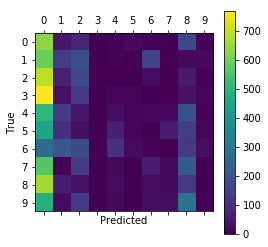

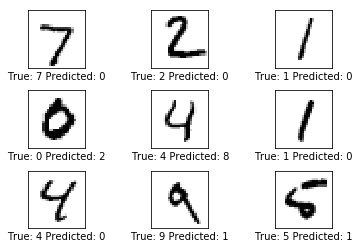

In [19]:
printTestAccuracy()

Training iteration 1 : accuracy 0.11505454778671265.
Accuracy on test set: 0.11550000309944153
[[602  54  91   1  14  27  10   2 170   9]
 [558 150 198   1   9   4 171   1  22  21]
 [664  73 183   1   4   4  31   3  59  10]
 [731  42 149   0  17  14   6   3  35  13]
 [479 133  55  10  33  21  19  21 202   9]
 [421 109  32   6  80  19   6  57 148  14]
 [240 205 197   1 120  28  10   5 123  29]
 [524   8 148   6  20   2  74  21 223   2]
 [627  76  41   6  27   8  29  19 135   6]
 [457  23 138   1  22   2  28  36 300   2]]


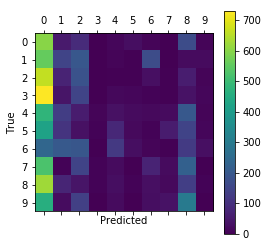

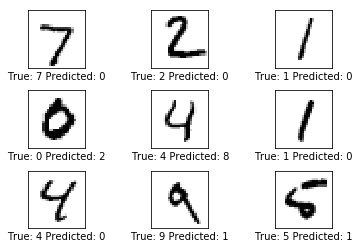

In [20]:
optimize(1)
printTestAccuracy()

In [ ]:
optimize(9)
printTestAccuracy()

Training iteration 2 : accuracy 0.12025454640388489.
Training iteration 3 : accuracy 0.12201818078756332.
Training iteration 4 : accuracy 0.12376363575458527.


In [ ]:
optimize(90)
printTestAccuracy()